<h2><font color='Brown'> Tp2 par Intissar Sidaoui</font></h2>


<h2><font color='red'>I - L'algorithme de K-means : Clustering</font></h2>

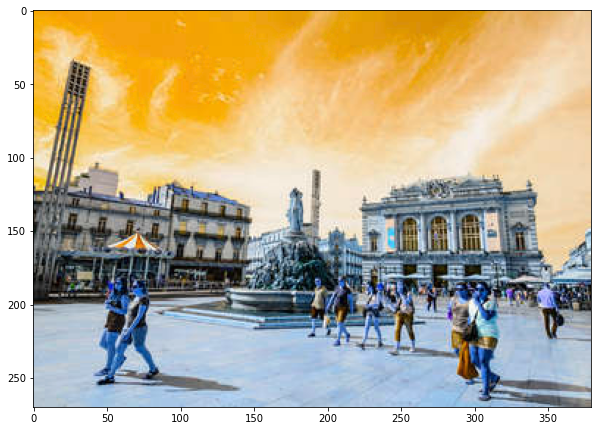

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('place.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 4)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

plt.figure(figsize=(10,11))
cv2.imwrite('place12.jpg', quant)
plt.imshow(image)

cv2.imread('place.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2><font color='red'>II - Le bruit sur l'image</font></h2>

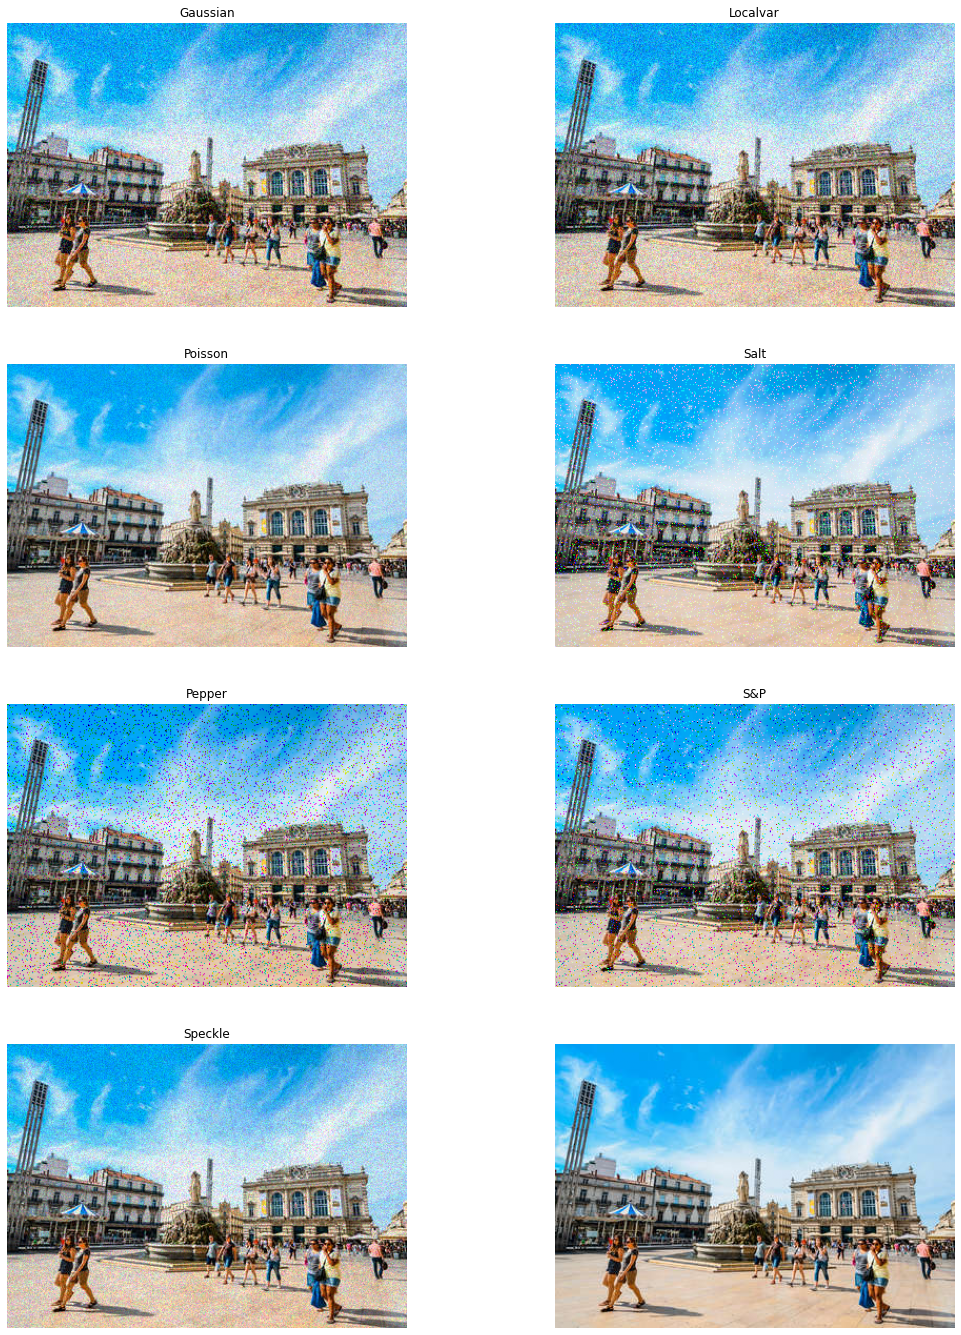

In [2]:
import skimage.io
import matplotlib.pyplot as plt

img_path="place.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "Gaussian", r,c,1)
plotnoise(img, "Localvar", r,c,2)
plotnoise(img, "Poisson", r,c,3)
plotnoise(img, "Salt", r,c,4)
plotnoise(img, "Pepper", r,c,5)
plotnoise(img, "S&P", r,c,6)
plotnoise(img, "Speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

<h2><font color='red'>III - Débruitage</font></h2> 

<I><b> NL-Means : Le but est donc de faire la moyenne de tous les pixels dont le même contenu
       est très similaire plus ou moins du bruit.</b></I>

In [3]:
images = cv2.imread('place.jpg')
b,g,r = cv2.split(images)          
rgb_img = cv2.merge([r,g,b])

def plotdenoising(rgb_img, mode, b, g, r):
    plt.subplot(b,g,r)
    if mode is not None:
        dst = cv2.fastNlMeansDenoisingColored(rgb_img,None,10,10,7,21)        
        plt.imshow(dst)
        b,g,r = cv2.split(dst)      
        rgb_dst = cv2.merge([r,g,b])
        
    if mode is None:
        plt.imshow(rgb_img)
    plt.title(mode)
    plt.axis("off")     

plt.figure(figsize=(18,24))
b=4
g=2
plotdenoising(rgb_dst, "Gaussian", b,g,1)
plotdenoising(rgb_dst, "Localvar", b,g,2)
plotdenoising(rgb_dst, "Poisson", b,g,3)
plotdenoising(rgb_dst, "Salt", b,g,4)
plotdenoising(rgb_dst, "Pepper", b,g,5)
plotdenoising(rgb_dst, "S&P", b,g,6)
plotdenoising(rgb_dst, "Speckle", b,g,7)
plotdenoising(rgb_dst, None, b,g,8)
plt.show()

NameError: name 'rgb_dst' is not defined

<Figure size 1296x1728 with 0 Axes>

<h2><font color='red'> IV - La comparaison entre l'image originale et l'image aprés le débruitage</font></h2>

<font size="4px">
    Aprés le débruitage les images sont constantes par morceaux, les voisinages de pixels/voxels sont largement corrélés.<br />
    On peut conclure donc que le débruitage moyennage local de voxels (la réduction du bruit signifie des pixels locaux).
</font>

In [ ]:
images = cv2.imread('place.jpg')
b,g,r = cv2.split(images)  
rgb_img = cv2.merge([r,g,b])     

#Denoising
dst = cv2.fastNlMeansDenoisingColored(images,None,10,10,7,21)

b,g,r = cv2.split(dst)        
rgb_dst = cv2.merge([r,g,b])     

plt.figure(figsize=(9,13))
plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()